In [ ]:
## Project: 2014 Heart Disease Mortality of 500 Random Counties, based on the Concentration of McDonald's Restaurants
## Further Considerations by Gender, Race/Ethnicity, and Income Level

## Data Analysis Notebook

In [14]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#Importing Cleaned CDC Data
cdc_pd = pd.read_csv("Final_Clean_CDC_Data.csv")
cdc_pd.head()

,State,County,"Deaths per 100,000",Gender,Race/Ethnicity,Geographical Coordinates
0,AK,"Aleutians East, AK",105.3,Overall,Overall,"(55.440626, -161.962562)"
1,AK,"Aleutians West, AK",211.9,Overall,Overall,"(52.995403, -170.251538)"
2,AK,"Anchorage, AK",257.9,Overall,Overall,"(61.159049, -149.103905)"
3,AK,"Bethel, AK",351.6,Overall,Overall,"(60.924483, -159.749655)"
4,AK,"Denali, AK",305.5,Overall,Overall,"(63.678399, -149.962076)"


In [16]:
# Importing the Dataframe of 500 Random Counties and their number of McDonalds
mcd_pd = pd.read_csv("Mcdonalds_per_County.csv")
mcd_pd


,County,Number of Mcdonalds
0,"Ada County, ID",30
1,"Adams County, CO",50
2,"Adams County, IL",4
3,"Adams County, MS",3
4,"Adams County, ND",1
5,"Adams County, NE",3
6,"Alameda County, CA",50
7,"Alcona County, MI",6
8,"Allegan County, MI",47
9,"Anoka County, MN",50


In [17]:
# Merging the two dataframes so that we have mortality information for only 500 counties
sample_counties = pd.merge(cdc_pd, mcd_pd, on="County")
sample_counties.sort_values("County")

,State,County,"Deaths per 100,000",Gender,Race/Ethnicity,Geographical Coordinates,Number of Mcdonalds
1096,ID,"Ada County, ID",226.1,Female,White,"(43.443315, -116.233977)",30
1098,ID,"Ada County, ID",181.3,Overall,Hispanic,"(43.443315, -116.233977)",30
1097,ID,"Ada County, ID",217.3,Overall,Black,"(43.443315, -116.233977)",30
1101,ID,"Ada County, ID",142.3,Overall,Asian and Pacific Islander,"(43.443315, -116.233977)",30
1095,ID,"Ada County, ID",347.6,Male,White,"(43.443315, -116.233977)",30
1094,ID,"Ada County, ID",278.2,Overall,White,"(43.443315, -116.233977)",30
1093,ID,"Ada County, ID",221.9,Female,Overall,"(43.443315, -116.233977)",30
1092,ID,"Ada County, ID",344.3,Male,Overall,"(43.443315, -116.233977)",30
1099,ID,"Ada County, ID",251.9,Male,Hispanic,"(43.443315, -116.233977)",30
1091,ID,"Ada County, ID",274.5,Overall,Overall,"(43.443315, -116.233977)",30


In [18]:
#Pulling Mortality Rates by Gender to Build Pie Chart Visualizations

#Overall Male Mortality
overall_male = sample_counties.groupby(["Gender"]).get_group(("Male"))
tot_male = overall_male[(overall_male["Gender"] == "Male") &  (overall_male["Race/Ethnicity"] == "Overall")]
tot_male = tot_male["Deaths per 100,000"].sum() 

#Overall Female Mortality
overall_female = sample_counties.groupby(["Gender"]).get_group(("Female"))
tot_female = overall_female[(overall_female["Gender"] == "Female") &  (overall_female["Race/Ethnicity"] == "Overall")]
tot_female = tot_female["Deaths per 100,000"].sum()

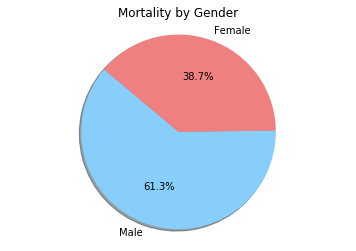

In [19]:
## Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [tot_male, tot_female]

# The colors of each section of the pie chart
colors = ["lightskyblue", "lightcoral"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Mortality by Gender")

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("Pie_Mortality_by_Gender.png")

In [20]:
#Pulling Mortality Rates by Race to Build Pie Chart Visualizations

#American Indian and Alaskan Native Mortality
aian_mort = sample_counties.groupby(["Race/Ethnicity"]).get_group(("American Indian and Alaskan Native"))
tot_aian_mort = aian_mort[(aian_mort["Gender"] == "Overall") &  (aian_mort["Race/Ethnicity"] == "American Indian and Alaskan Native")]
tot_aian_mort = tot_aian_mort["Deaths per 100,000"].sum()

#Asian and Pacific Islander Mortality
api_mort = sample_counties.groupby(["Race/Ethnicity"]).get_group(("Asian and Pacific Islander"))
tot_api_mort = api_mort[(api_mort["Gender"] == "Overall") &  (api_mort["Race/Ethnicity"] == "Asian and Pacific Islander")]
tot_api_mort = tot_api_mort["Deaths per 100,000"].sum()

#Black Mortality
blk_mort = sample_counties.groupby(["Race/Ethnicity"]).get_group(("Black"))
tot_blk_mort = blk_mort[(blk_mort["Gender"] == "Overall") &  (blk_mort["Race/Ethnicity"] == "Black")]
tot_blk_mort = tot_blk_mort["Deaths per 100,000"].sum()

#Hispanic Mortality
his_mort = sample_counties.groupby(["Race/Ethnicity"]).get_group(("Hispanic"))
tot_his_mort = his_mort[(his_mort["Gender"] == "Overall") &  (his_mort["Race/Ethnicity"] == "Hispanic")]
tot_his_mort = tot_his_mort["Deaths per 100,000"].sum()

#White Mortality
wht_mort = sample_counties.groupby(["Race/Ethnicity"]).get_group(("White"))
tot_wht_mort = wht_mort[(wht_mort["Gender"] == "Overall") &  (wht_mort["Race/Ethnicity"] == "White")]
tot_wht_mort = tot_wht_mort["Deaths per 100,000"].sum()


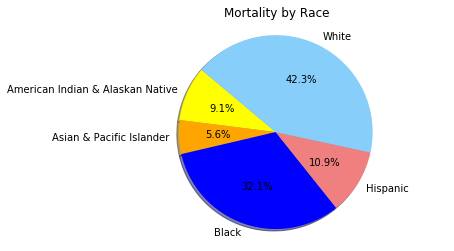

In [21]:
## Labels for the sections of our pie chart
labels = ["American Indian & Alaskan Native", "Asian & Pacific Islander", "Black", "Hispanic", "White"]

# The values of each section of the pie chart
sizes = [tot_aian_mort, tot_api_mort, tot_blk_mort, tot_his_mort, tot_wht_mort]

# The colors of each section of the pie chart
colors = ["yellow", "orange", "blue", "lightcoral", "lightskyblue"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Mortality by Race")

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("Pie_Mortality_by_Race.png")